In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

# Load data

In [5]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df = df[['stars','text',
 'clean_text']]

## select 1 & 5 stars

In [6]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


## split


In [7]:
# split
X = data['clean_text'].values.astype(str)

y = data['stars'].values

## train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## CountVectorizer

In [9]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Multinimial NB: CountVectorizer

In [11]:
mn_count_clf = MultinomialNB()

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.957


In [12]:
alpha_results = dict()

alpha_values = np.arange(0,1.1,.1)
alpha_values = np.around(alpha_values, decimals=2)
alpha_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [13]:
last_score = 0
for alpha in alpha_values:
    mn_count_clf = MultinomialNB(alpha=alpha)
    mn_count_clf.fit(count_train, y_train)
    pred = mn_count_clf.predict(count_test)
    score = metrics.accuracy_score(y_test, pred)
    
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    alpha_results[alpha] = score

Alpha: 0.00 Score: 0.91233
Alpha: 0.10 Score: 0.95526
Alpha: 0.20 Score: 0.95639
Alpha: 0.30 Score: 0.95667
Alpha: 0.40 Score: 0.95673
Alpha: 0.50 Score: 0.95645
Alpha: 0.60 Score: 0.95639
Alpha: 0.70 Score: 0.95645
Alpha: 0.80 Score: 0.95656
Alpha: 0.90 Score: 0.95673
Alpha: 1.00 Score: 0.95673


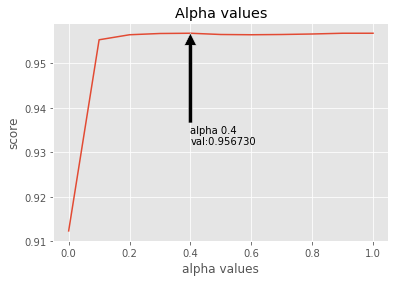

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(alpha_results.keys())
y=list(alpha_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'alpha 0.{}\nval:{:3f}'.format(xpos,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), xytext=(xmax, ymax-.025)
            )
plt.title('Alpha values')
plt.xlabel('alpha values')
plt.ylabel('score')
plt.show()

In [15]:
mn_count_clf = MultinomialNB(alpha=0.4)

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.957


In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95      7241
           5       0.97      0.95      0.96     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.95      0.96      0.96     17726
weighted avg       0.96      0.96      0.96     17726



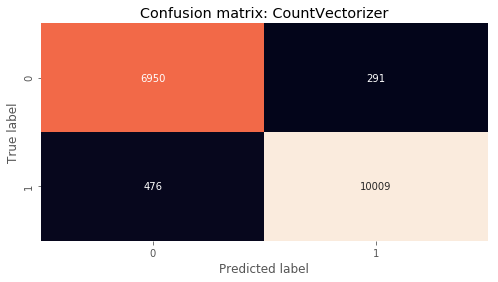

In [17]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix: CountVectorizer')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Multinimial NB: TfidfVectorizer

In [18]:
mn_tfidf_clf = MultinomialNB()
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.955


In [19]:
feature_names = tfidf_vectorizer.get_feature_names()
coefs = mn_tfidf_clf.coef_
intercept = mn_tfidf_clf.intercept_
coefs_w_fns = sorted(zip(mn_tfidf_clf.coef_[0],feature_names))
n=10
top_n_coefs = zip(coefs_w_fns[:n], coefs_w_fns[:-(n+1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top_n_coefs:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1,fn_1,coef_2, fn_2))

	-11.8772	____           		-4.8180	dr             
	-11.8772	_o             		-5.2018	staff          
	-11.8772	aaaaaaahhh     		-5.2498	great          
	-11.8772	aaaah          		-5.3428	not            
	-11.8772	aaaai          		-5.3578	good           
	-11.8772	aaahh          		-5.3630	doctor         
	-11.8772	aair           		-5.3889	care           
	-11.8772	aal            		-5.4747	time           
	-11.8772	aara           		-5.4914	recommend      
	-11.8772	aasm           		-5.5003	go             


## alpha values

In [19]:
alpha_results = dict()
alpha_values = np.arange(0,1.1,.1)
alpha_values = np.around(alpha_values, decimals=2)
alpha_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [20]:
for alpha in alpha_values:
    mn_tfidf_clf = MultinomialNB(alpha=alpha)

    mn_tfidf_clf.fit(tfidf_train, y_train)
    pred = mn_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    alpha_results[alpha] = score

Alpha: 0.00 Score: 0.89247
Alpha: 0.10 Score: 0.95086
Alpha: 0.20 Score: 0.95272
Alpha: 0.30 Score: 0.95425
Alpha: 0.40 Score: 0.95521
Alpha: 0.50 Score: 0.95538
Alpha: 0.60 Score: 0.95611
Alpha: 0.70 Score: 0.95594
Alpha: 0.80 Score: 0.95543
Alpha: 0.90 Score: 0.95538
Alpha: 1.00 Score: 0.95543


## Plot best alpha value

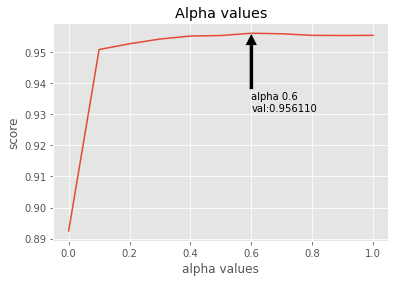

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(alpha_results.keys())
y=list(alpha_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'alpha 0.{}\nval:{:3f}'.format(xpos,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), xytext=(xmax, ymax-.025)
            )
plt.title('Alpha values')
plt.xlabel('alpha values')
plt.ylabel('score')
plt.show()

In [22]:
mn_tfidf_clf = MultinomialNB(alpha=0.6)
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.956


In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      7241
           5       0.96      0.96      0.96     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.95      0.95      0.95     17726
weighted avg       0.96      0.96      0.96     17726



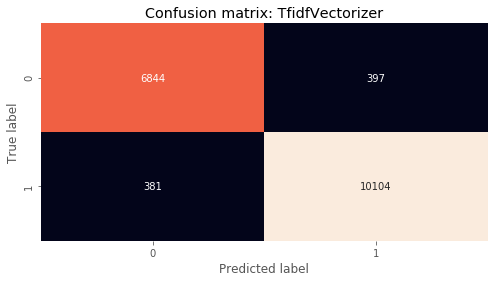

In [24]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix: TfidfVectorizer')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
feature_names = tfidf_vectorizer.get_feature_names()
coefs = mn_tfidf_clf.coef_
intercept = mn_tfidf_clf.intercept_
coefs_w_fns = sorted(zip(mn_tfidf_clf.coef_[0],feature_names))
n=20
top_n_coefs = zip(coefs_w_fns[:n], coefs_w_fns[:-(n+1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top_n_coefs:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1,fn_1,coef_2, fn_2))

	-12.2929	____           		-4.7233	dr             
	-12.2929	_o             		-5.1072	staff          
	-12.2929	aaaaaaahhh     		-5.1553	great          
	-12.2929	aaaah          		-5.2483	not            
	-12.2929	aaaai          		-5.2633	good           
	-12.2929	aaahh          		-5.2685	doctor         
	-12.2929	aair           		-5.2944	care           
	-12.2929	aal            		-5.3803	time           
	-12.2929	aara           		-5.3970	recommend      
	-12.2929	aasm           		-5.4059	go             
	-12.2929	abandonment    		-5.4531	office         
	-12.2929	abbess         		-5.4606	friendly       
	-12.2929	abbreviate     		-5.5115	feel           
	-12.2929	abbreviation   		-5.5120	see            
	-12.2929	abcess         		-5.5506	get            
	-12.2929	abdelsayef     		-5.6084	take           
	-12.2929	abdi           		-5.6233	make           
	-12.2929	abdicate       		-5.6414	always         
	-12.2929	abdoman        		-5.7152	year           
	-12.2929	abet           		-5.7